## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\andrea\A\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\andrea\A\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Diametro tronco (cm)",
            "P", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

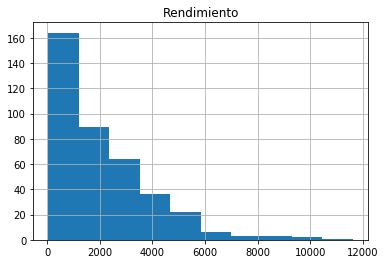

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 1000.0, 'epsilon': 3.1622776601683795, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 10000.0, 'epsilon': 1.0, 'gamma': 0.01}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[1194.16910919 2614.38396043 1557.9892103  1423.0369491  1960.32037153
  463.90256944 1732.29364734 2020.99474355 1248.0307073  2829.66683759
 2413.77285568  942.63447528  656.13329113 2256.10655699 2251.37225871
 1821.62370424 1802.40389958 1222.67391516 2289.18093421 1946.21562571
 1406.36315462 2505.45370355 1529.77971864 1830.61339123 2136.62969436
 1346.4180229   857.01438101 2631.37094377  872.94019841 2344.5744453
 1728.61753762 1357.73285785 1096.79506006 2626.13791529 1707.26439891
 2170.61591344 1281.44368943  770.8829288   783.61014151  776.55776859
 1676.70411629 2385.56336403 2451.38551121 1910.54028425  866.4175449
 2331.74534496 1071.7841731  1612.40330782  718.31771372 1086.50288271
 1408.38640187 2246.1575917  1583.84791098 2216.30641411 1798.94524679
 2378.34768748 1209.11497074 2326.08448471 1263.16092535 2734.80574649
 2037.48299668 1364.26717483 1249.05617952 1934.46167085  757.7631043
  795.56011633 1968.76425711 1215.94908596 1324.30372832 2665.30748958
 2300.738

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[  376.5249926   1874.23698432  1116.82851493 -1170.21730392
    747.40783134   773.17860283  -312.18198785 -1969.23318464
   1703.69519616]]


In [14]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.12977183518966284

In [15]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[1194.16910919 2614.38396043 1557.9892103  1423.0369491  1960.32037153
  463.90256944 1732.29364734 2020.99474355 1248.0307073  2829.66683759
 2413.77285568  942.63447528  656.13329113 2256.10655699 2251.37225871
 1821.62370424 1802.40389958 1222.67391516 2289.18093421 1946.21562571
 1406.36315462 2505.45370355 1529.77971864 1830.61339123 2136.62969436
 1346.4180229   857.01438101 2631.37094377  872.94019841 2344.5744453
 1728.61753762 1357.73285785 1096.79506006 2626.13791529 1707.26439891
 2170.61591344 1281.44368943  770.8829288   783.61014151  776.55776859
 1676.70411629 2385.56336403 2451.38551121 1910.54028425  866.4175449
 2331.74534496 1071.7841731  1612.40330782  718.31771372 1086.50288271
 1408.38640187 2246.1575917  1583.84791098 2216.30641411 1798.94524679
 2378.34768748 1209.11497074 2326.08448471 1263.16092535 2734.80574649
 2037.48299668 1364.26717483 1249.05617952 1934.46167085  757.7631043
  795.56011633 1968.76425711 1215.94908596 1324.30372832 2665.30748958
 2300.738

In [16]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.12977183518966284

In [17]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [18]:
reg.best_params_

{'C': 1000000.0, 'kernel': 'linear'}

### Cross Validation

In [19]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
     
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    #Escalando particiòn de datos
    scaler2= preprocessing.StandardScaler().fit(x2_train)
    X2_train_scaled=scaler.transform(x2_train)
    X2_test_scaled=scaler.transform(x2_test)
 
       
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X2_train_scaled, y2_train)
    y_lin = svr_lin.predict(X2_test_scaled)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0887
RMSE: 1739.0115
MAE: 910.3543


### Hold Out Validation

In [20]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(100):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.2, random_state=12) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler3= preprocessing.StandardScaler().fit(x3_train)
    X3_train_scaled=scaler.transform(x3_train)
    X3_test_scaled=scaler.transform(x3_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X3_train_scaled, y3_train)
    y_lin = svr_lin.predict(X3_test_scaled)
    
    r_2=r2_score(y3_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y3_test-y_lin),2)/np.sqrt(len(y3_test)))
    MAE.append(median_absolute_error(y3_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y3_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1583
RMSE: 1965.5935
MAE: 874.1191


In [21]:
RMSE

[1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677739087,
 1965.5934677

In [22]:
datos = np.asarray(RMSE)
np.savetxt("RMSE_SVM2.csv",   # Archivo de salida
           datos,        
           delimiter=",")  # Para que sea un archivo CSV